In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

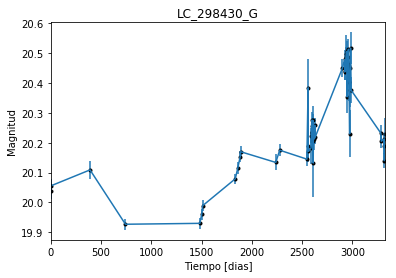

In [2]:
data = np.genfromtxt('LC_298430_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_298430_G')
plt.savefig("LC_298430_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

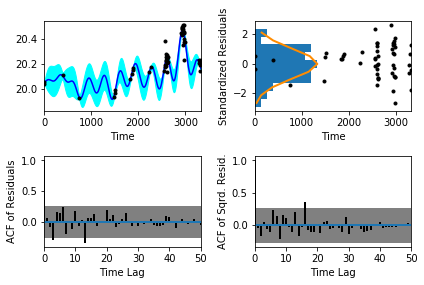

In [5]:
sample.assess_fit()

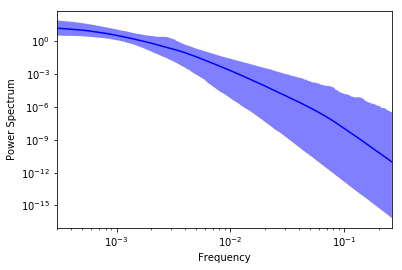

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

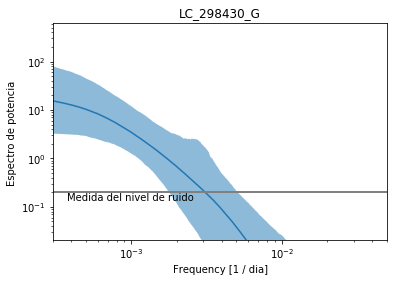

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_298430_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_298430_G')

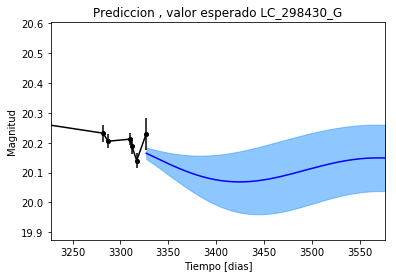

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_298430_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_298430_G')

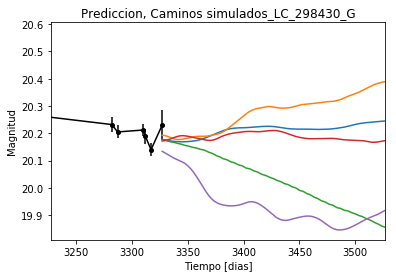

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_298430_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


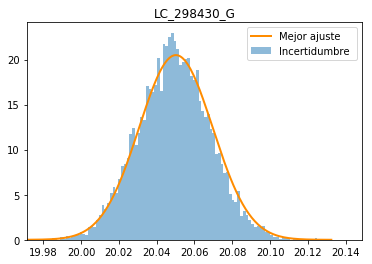

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_298430_G')
plt.savefig("Mejor_ajuste_LC_297623_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_297623_G')

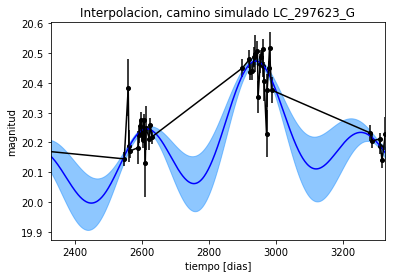

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_G')

Text(0.5,1,'Interpolacion, camino simulado LC_297623_G')

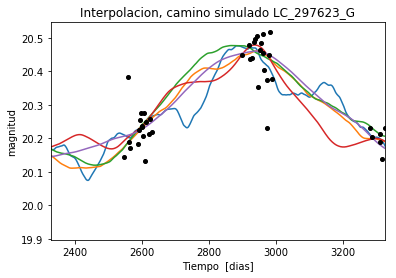

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1339.80286009
Median: 0.00921430865074
Standard deviation: 0.107842193917
68% credibility interval: [ 0.00085155  0.12509127]
95% credibility interval: [  3.42572404e-04   4.27051271e-01]
99% credibility interval: [  3.08747176e-04   4.98211430e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 511.265429387
Median: 0.00147401771141
Standard deviation: 0.0404414705877
68% credibility interval: [ 0.00044009  0.01056091]
95% credibility interval: [ 0.0003153   0.11913813]
99% credibility interval: [ 0.00030494  0.29691605]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 453.556835851
Median: 0.011420485508
Standard deviation:

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 964.380798628
Median: 100.952530475
Standard deviation: 1.66280853909
68% credibility interval: [  99.08218736  102.1580439 ]
95% credibility interval: [  96.52647159  102.92876944]
99% credibility interval: [  94.57564947  103.21230331]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 629.010454623
Median: 0.432688611582
Standard deviation: 1.12765817006
68% credibility interval: [ 0.04388322  2.16145762]
95% credibility interval: [ 0.01270999  3.69305063]
99% credibility interval: [ 0.0088217   4.90238187]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 644.911672552
Median: 0.106426510944
Standard deviation: 2.04016540584
68% credibility interval: [ 0.00746684  1.42523455]
95% credibility interval: [  6.22379296e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2215.62537539
Median: 1.1312438922e-39
Standard deviation: 3.68339120973e+56
68% credibility interval: [  4.26816824e-83   2.55427390e-10]
95% credibility interval: [  7.06965904e-133   3.94164265e+000]
99% credibility interval: [  6.17204993e-156   1.60909205e+050]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3221.27230962
Median: 20.1090205098
Standard deviation: 0.0923894150085
68% credibility interval: [ 20.0296811   20.18379793]
95% credibility interval: [ 19.90992654  20.28274197]
99% credibility interval: [ 19.79851343  20.3842192 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1229.67369053
Median: 0.00123403348462
Standard deviation: 0.106645015988
68% credibility interval: [ 0.          0.10516757]
95% credibility interval: [ 0.          0.40625452]
99% credibility interval: [ 0.          0.49919142]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1229.67369053
Median: 0.00123403348462
Standard deviation: 0.106645015988
68% credibility interval: [ 0.          0.10516757]
95% credibility interval: [ 0.          0.40625452]
99% credibility interval: [ 0.          0.49919142]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 582.835733483
Median: 0.0
Standard deviation: 0.000336665738662
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 964.380798628
Median: 100.952530475
Standard deviation: 1.66280853909
68% credibility interval: [  99.08218736  102.1580439 ]
95% credibility interval: [  96.52647159  102.92876944]
99% credibility interval: [  94.57564947  103.21230331]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2283.17827075
Median: 0.0293256690715
Standard deviation: 0.0368829545919
68% credibility interval: [ 0.01772929  0.05445288]
95% credibility interval: [ 0.01168431  0.12368856]
99% credibility interval: [ 0.00901829  0.22743663]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1795.35451756
Median: 1.16443701876
Standard deviation: 0.18808622003
68% credibility interval: [ 1.00015309  1.36798815]
95% credibility interval: [ 0.86955269  1.61594604]
99% credibility interval: [ 0.79256615  1.77487662]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 644.401882395
Median: 2.07971250865e-05
Standard deviation: 0.00841295748383
68% credibility interval: [  8.96272934e-07   3.72717687e-04]
95% credibility interval: [  2.38880907e-08   2.85221726e-03]
99% credibility interval: [  3.61015528e-54   2.05624952e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1339.80286009
Median: (-0.0578952087301-1.12137927252j)
Standard deviation: 0.952956409221
68% credibility interval: [-0.78597161+0.j         -0.00535042-0.01359594j]
95% credibility interval: [ -2.68324227e+00+0.j          -2.15244589e-03-0.02106178j]
99% credibility interval: [ -3.13035474e+00+0.j          -1.93991572e-03-0.25489625j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 511.265429387
Median: (-0.00926152642683+0j)
Standard deviation: 0.716632252165
68% credibility interval: [-0.06635616+2.62014888j -0.00276519+0.j        ]
95% credibility interval: [-0.74856694+1.56828317j -0.00198106+0.j        ]
99% credibility interval: [-1.86557853 +3.96544804e-01j -0.00191597 +1.32520412e-04j]
Posterior summary for p